In [1]:
import astropy.io.fits as pyfits
import matplotlib.pyplot as plt
import numpy as np
import ugradio
plt.rcParams["font.family"] = "Times New Roman"

# Doppler Correction

In [2]:
#hi = ugradio.doppler.get_projected_velocity(ra,dec,jd)
#hi[0]
#ra, dec, jd

# Filter Function:

In [3]:
from scipy import optimize as opt
def BaseCurve(x,a,b,c):
    return a*(x**2)+b*x+c

def filtration(xdata,ydata):
    
    params,params_covariance = opt.curve_fit(BaseCurve,xdata,ydata)
    Background = BaseCurve(xdata,params[0],params[1],params[2])
    cal = ydata-Background
    m = np.mean(cal)
    for i in range (0,len(cal)):
        if (cal[i]<m+0.001):
            cal[i]=0
    cal[5500:6000]=0 #for leuschner observations 2019
    return cal
def DopplerCorrection(Data):
    ra = Data[0].header['RA']
    dec = Data[0].header['DEC']
    jd = Data[0].header['JD']
    v = ugradio.doppler.get_projected_velocity(ra,dec,jd)[0]
    return v

# Gain:

In [4]:
Tcal = 30
DA = pyfits.open('noisecal.fits')
            
D = np.array([])
           
for k in range (1,11):
    D = np.append(D, DA[k].data['auto0_real'])
    
D.shape = (10,-1)
            
Psys = D.mean(0)
            
ra=DA[0].header['RA']
dec=DA[0].header['DEC']
jd = DA[0].header['JD']
    
DB = pyfits.open('TestMap_14.0_-18.0.fits')
            
E = np.array([])
           
for k in range (1,11):
    E = np.append(E, DB[k].data['auto0_real'])
    
E.shape = (10,-1)

Pcold = E.mean(0)
    



Gain = np.mean((Psys-Pcold)/Tcal)
print(1/Gain)

11952.8794742


In [5]:
DopplerCorrection(DA)

21458.337580497082

batch1 done!
batch2 done!
batch3 done!


/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'Times New Roman'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


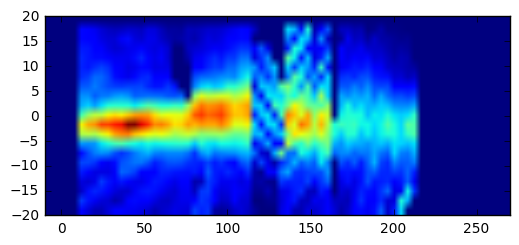

In [6]:
li = -10
lsteps = 70
bi = -20
bsteps = 21

#L=lf-li
#B = bf-bi
c = 3*10**8
MAP = np.zeros((bsteps,lsteps))
pixels=0
for j in range (0,lsteps):
    
    for i in range(0,bsteps):
        l = str(j*4+li)
        b = str(i*2+bi)
        #print(l,b)
    
        try:
            
            Data = pyfits.open('TestMap_'+l+'.0_'+b+'.0.fits')
            
            D = np.array([])
           

            for k in range (1,11):
                D = np.append(D, Data[k].data['auto0_real'])
    
            D.shape = (10,-1)
            

            ydata = D.mean(0)
            
            
            res=Data[0].header['RES']
            samp=Data[0].header['SAMPRATE']
            lo = (635*2*10**6)
            freq = (np.arange(-4096,4096)*res)+lo+150*10**6
            xdata=freq
            #np.savez('FrequencyL'+l+'B'+b+'.npz',data='xdata')
            Filt = filtration(xdata,ydata)
            #np.savez('PowerL'+l+'B'+b+'.npz', data=Filt)
            pix = np.sum(Filt)
            MAP[bsteps-i,j] = pix
            if (b=='4'):
                np.savez('Ridge'+l+'b4.npz',data=Filt)
                x = xdata/10**6
                vel = c*(x-1421)/1421+DopplerCorrection(Data)
                np.savez('Vfreq'+l+'b4.npz',data=vel)
########################Velocities:
            #ra=Data[0].header['RA']
            #dec=Data[0].header['DEC']
            #jd = Data[0].header['JD']
            #v_correct = ugradio.doppler(ra,dec,jd)
            #velocity = (3*10**8)*(xdata-(1421*10**6))/(1421*10**6)
            #VEL=velocity-v_correct
            #np.savez('Velocity'+l+'B'+b+'.npz', data=Filt)
            
        except:
            continue
print('batch1 done!')
#next mapping session:
for j in range (0,lsteps):
    
    for i in range(0,bsteps):
        l = str(j*4+li)
        b = str(i*2+bi)
        #print(l,b)
    
        try:
            
            Data = pyfits.open('newTestMap_'+l+'.0_'+b+'.0.fits')
            
            D = np.array([])
           

            for k in range (1,11):
                D = np.append(D, Data[k].data['auto0_real'])
    
            D.shape = (10,-1)
            

            ydata = D.mean(0)
            res=Data[0].header['RES']
            samp=Data[0].header['SAMPRATE']
            lo = (635*2*10**6)
            freq = (np.arange(-4096,4096)*res)+lo+150*10**6
            xdata=freq
            #np.savez('FrequencyL'+l+'B'+b+'.npz',data='xdata')
            Filt = filtration(xdata,ydata)
            #np.savez('PowerL'+l+'B'+b+'.npz', data=Filt)
            pix = np.sum(Filt)
            MAP[bsteps-i,j] = pix
            if (b=='4'):
                np.savez('Ridge'+l+'b4.npz',data=Filt)
                x = xdata/10**6
                vel = c*(x-1421)/1421+DopplerCorrection(Data)
                np.savez('Vfreq'+l+'b4.npz',data=vel)
########################Velocities:
            #ra=Data[0].header['RA']
            #dec=Data[0].header['DEC']
            #jd = Data[0].header['JD']
            #v_correct = ugradio.doppler(ra,dec,jd)
            #velocity = (3*10**8)*(xdata-(1421*10**6))/(1421*10**6)
            #VEL=velocity-v_correct
            #np.savez('Velocity'+l+'B'+b+'.npz', data=Filt)
            

        except:
            continue
print('batch2 done!')
#next batch:
for j in range (0,lsteps):
    
    for i in range(0,bsteps):
        l = str(j*4+li)
        b = str(i*2+bi)
        #print(l,b)
    
        try:
            
            Data = pyfits.open('newnewTestMap_'+l+'.0_'+b+'.0.fits')
            
            D = np.array([])
           

            for k in range (1,11):
                D = np.append(D, Data[k].data['auto0_real'])
    
            D.shape = (10,-1)
            

            ydata = D.mean(0)
            
            res=Data[0].header['RES']
            samp=Data[0].header['SAMPRATE']
            lo = (635*2*10**6)
            freq = (np.arange(-4096,4096)*res)+lo+150*10**6
            xdata=freq
            #np.savez('FrequencyL'+l+'B'+b+'.npz',data='xdata')
            Filt = filtration(xdata,ydata)
            #np.savez('PowerL'+l+'B'+b+'.npz', data=Filt)
            pix = np.sum(Filt)
            MAP[bsteps-i,j] = pix
            if (b=='4'):
                np.savez('Ridge'+l+'b4.npz',data=Filt)
                x = xdata/10**6
                vel = c*(x-1421)/1421+DopplerCorrection(Data)
                #print(DopplerCorrection(Data))
                np.savez('Vfreq'+l+'b4.npz',data=vel)
########################Velocities:
            #ra=Data[0].header['RA']
            #dec=Data[0].header['DEC']
            #jd = Data[0].header['JD']
            #v_correct = ugradio.doppler(ra,dec,jd)
            #velocity = (3*10**8)*(xdata-(1421*10**6))/(1421*10**6)
            #VEL=velocity-v_correct
            #np.savez('Velocity'+l+'B'+b+'.npz', data=Filt)
        except:
            continue
print('batch3 done!')

plt.imshow(MAP,aspect=3,extent=[-10,270,-20,20])
plt.figure(figsize=(3,30))
plt.savefig('Map1.pdf')
plt.show()

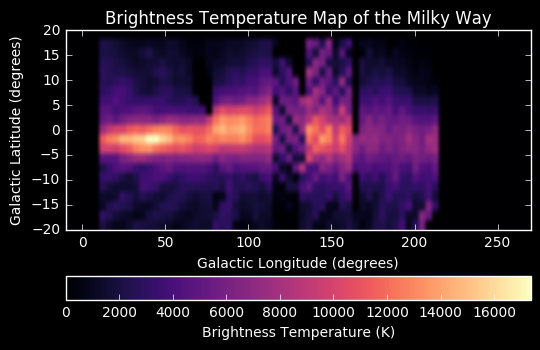

In [11]:

plt.imshow(MAP/Gain,aspect=3,extent=[-10,270,-20,20],interpolation='hanning',cmap='magma')

cbar = plt.colorbar(orientation='horizontal')
cbar.set_label('Brightness Temperature (K)')

plt.ylabel('Galactic Latitude (degrees)')
plt.xlabel('Galactic Longitude (degrees)')
plt.title('Brightness Temperature Map of the Milky Way')
plt.savefig('magma2.pdf')
plt.show()

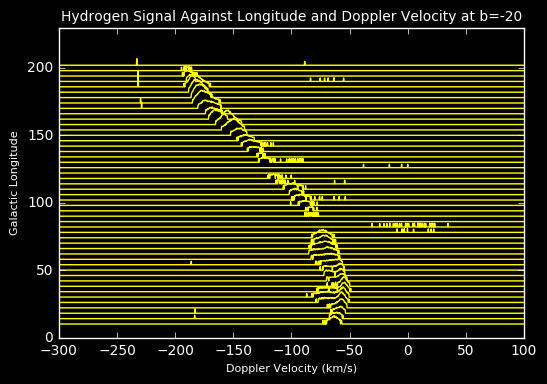

In [10]:
c = 3*10**8
r=0
#fig = plt.figure()

#fig.patch.set_facecolor('#E0E0E0')
for i in range (-10,270):
    r=i
    try:
        ydata = np.load('Ridge'+str(i)+'b-20.npz')['data']
        #print('hi')
        xdata = np.load('Vfreq'+str(i)+'b-20.npz')['data']
        
        #print(len(ydata))
        
        
        plt.plot(xdata/1000,(ydata)*2500+r,color='yellow')
        
    except:
        continue
plt.style.use('dark_background')
plt.title('Hydrogen Signal Against Longitude and Doppler Velocity at b=-20',fontsize=10)
plt.xlabel('Doppler Velocity (km/s)',fontsize=8)
plt.ylabel('Galactic Longitude',fontsize=8)
plt.xlim(-300,100)
plt.ylim(0,230)
plt.show()

#plt.show()

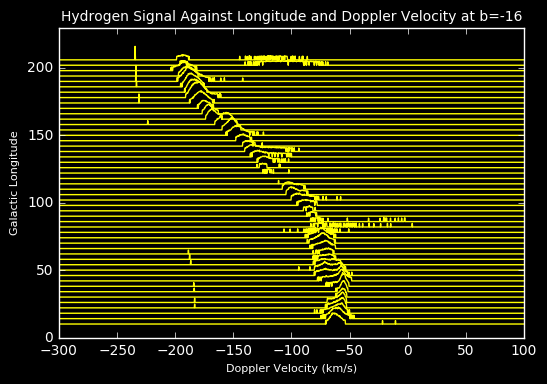

In [149]:
c = 3*10**8
r=0
#fig = plt.figure()

#fig.patch.set_facecolor('#E0E0E0')
for i in range (-10,270):
    r=i
    try:
        ydata = np.load('Ridge'+str(i)+'b-16.npz')['data']
        #print('hi')
        xdata = np.load('Vfreq'+str(i)+'b-16.npz')['data']
        
        #print(len(ydata))
        
        
        plt.plot(xdata/1000,(ydata)*2500+r,color='yellow')
        
    except:
        continue
plt.style.use('dark_background')
plt.title('Hydrogen Signal Against Longitude and Doppler Velocity at b=-16',fontsize=10)
plt.xlabel('Doppler Velocity (km/s)',fontsize=8)
plt.ylabel('Galactic Longitude',fontsize=8)
plt.xlim(-300,100)
plt.ylim(0,230)
plt.show()

#plt.show()

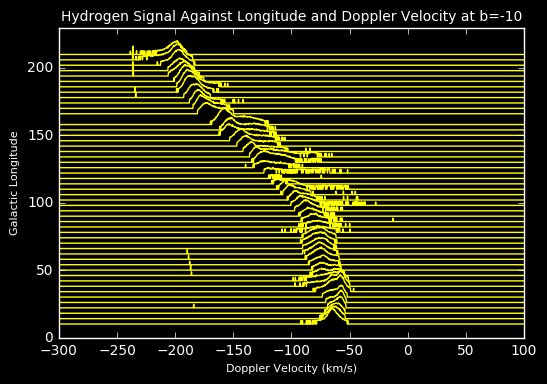

In [157]:
c = 3*10**8
r=0
#fig = plt.figure()

#fig.patch.set_facecolor('#E0E0E0')
for i in range (-10,270):
    r=i
    try:
        ydata = np.load('Ridge'+str(i)+'b-10.npz')['data']
        #print('hi')
        xdata = np.load('Vfreq'+str(i)+'b-10.npz')['data']
        
        #print(len(ydata))
        
        
        plt.plot(xdata/1000,(ydata)*2500+r,color='yellow')
        
    except:
        continue
plt.style.use('dark_background')
plt.title('Hydrogen Signal Against Longitude and Doppler Velocity at b=-10',fontsize=10)
plt.xlabel('Doppler Velocity (km/s)',fontsize=8)
plt.ylabel('Galactic Longitude',fontsize=8)
plt.xlim(-300,100)
plt.ylim(0,230)
plt.savefig('DV-10.pdf')
plt.show()

#plt.show()

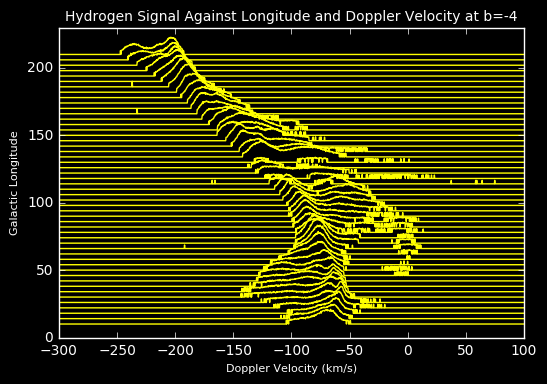

In [158]:
c = 3*10**8
r=0
#fig = plt.figure()

#fig.patch.set_facecolor('#E0E0E0')
for i in range (-10,270):
    r=i
    try:
        ydata = np.load('Ridge'+str(i)+'b-4.npz')['data']
        #print('hi')
        xdata = np.load('Vfreq'+str(i)+'b-4.npz')['data']
        
        #print(len(ydata))
        
        
        plt.plot(xdata/1000,(ydata)*2500+r,color='yellow')
        
    except:
        continue
plt.style.use('dark_background')
plt.title('Hydrogen Signal Against Longitude and Doppler Velocity at b=-4',fontsize=10)
plt.xlabel('Doppler Velocity (km/s)',fontsize=8)
plt.ylabel('Galactic Longitude',fontsize=8)
plt.xlim(-300,100)
plt.ylim(0,230)
plt.savefig('DV-4.pdf')
plt.show()

#plt.show()

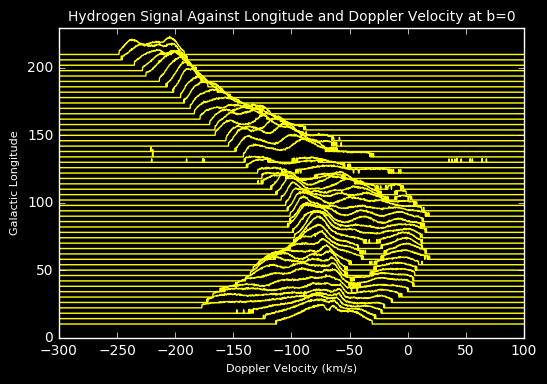

In [159]:
c = 3*10**8
r=0
#fig = plt.figure()

#fig.patch.set_facecolor('#E0E0E0')
for i in range (-10,270):
    r=i
    try:
        ydata = np.load('Ridge'+str(i)+'b0.npz')['data']
        
        xdata = np.load('Vfreq'+str(i)+'b0.npz')['data']
        
        #print(len(ydata))
        
        
        plt.plot(xdata/1000,(ydata)*2500+r,color='yellow')
        
    except:
        continue
plt.style.use('dark_background')
plt.title('Hydrogen Signal Against Longitude and Doppler Velocity at b=0',fontsize=10)
plt.xlabel('Doppler Velocity (km/s)',fontsize=8)
plt.ylabel('Galactic Longitude',fontsize=8)
plt.xlim(-300,100)
plt.ylim(0,230)
plt.savefig('DV0.pdf')
plt.show()

#plt.show()

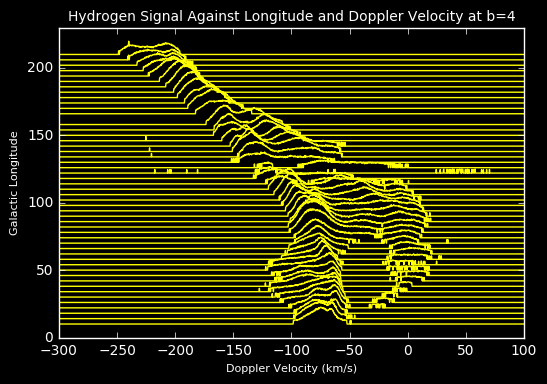

In [160]:
c = 3*10**8
r=0
#fig = plt.figure()

#fig.patch.set_facecolor('#E0E0E0')
for i in range (-10,270):
    r=i
    try:
        ydata = np.load('Ridge'+str(i)+'b4.npz')['data']
        #print('hi')
        xdata = np.load('Vfreq'+str(i)+'b4.npz')['data']
        
        #print(len(ydata))
        
        
        plt.plot(xdata/1000,(ydata)*2500+r,color='yellow')
        
    except:
        continue
plt.style.use('dark_background')
plt.title('Hydrogen Signal Against Longitude and Doppler Velocity at b=4',fontsize=10)
plt.xlabel('Doppler Velocity (km/s)',fontsize=8)
plt.ylabel('Galactic Longitude',fontsize=8)
plt.xlim(-300,100)
plt.ylim(0,230)
plt.savefig('DV4.pdf')
plt.show()

#plt.show()

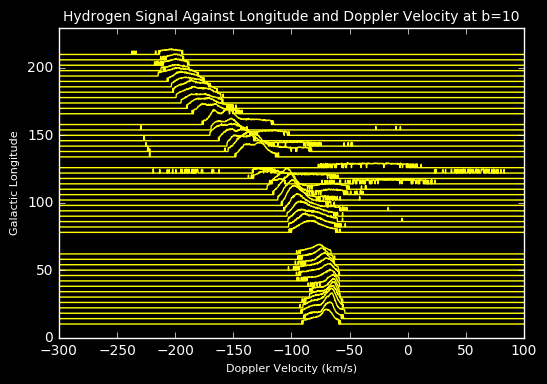

In [163]:
c = 3*10**8
r=0
#fig = plt.figure()

#fig.patch.set_facecolor('#E0E0E0')
for i in range (-10,270):
    r=i
    try:
        ydata = np.load('Ridge'+str(i)+'b10.npz')['data']
        
        xdata = np.load('Vfreq'+str(i)+'b10.npz')['data']
        
        #print(len(ydata))
        
        
        plt.plot(xdata/1000,(ydata)*2500+r,color='yellow')
        
    except:
        continue
plt.style.use('dark_background')
plt.title('Hydrogen Signal Against Longitude and Doppler Velocity at b=10',fontsize=10)
plt.xlabel('Doppler Velocity (km/s)',fontsize=8)
plt.ylabel('Galactic Longitude',fontsize=8)
plt.xlim(-300,100)
plt.ylim(0,230)
plt.savefig('DV10.pdf')
plt.show()

#plt.show()

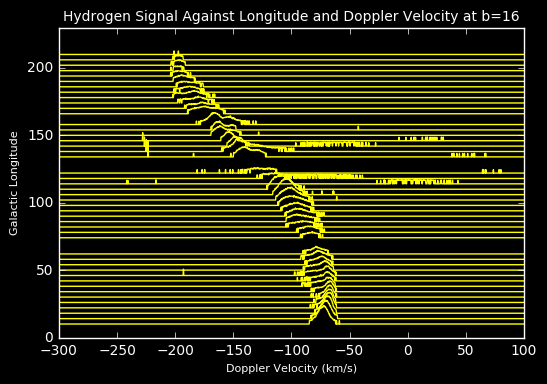

In [164]:
c = 3*10**8
r=0
#fig = plt.figure()

#fig.patch.set_facecolor('#E0E0E0')
for i in range (-10,270):
    r=i
    try:
        ydata = np.load('Ridge'+str(i)+'b16.npz')['data']
        #print('hi')
        xdata = np.load('Vfreq'+str(i)+'b16.npz')['data']
        
        #print(len(ydata))
        
        
        plt.plot(xdata/1000,(ydata)*2500+r,color='yellow')
        
    except:
        continue
plt.style.use('dark_background')
plt.title('Hydrogen Signal Against Longitude and Doppler Velocity at b=16',fontsize=10)
plt.xlabel('Doppler Velocity (km/s)',fontsize=8)
plt.ylabel('Galactic Longitude',fontsize=8)
plt.xlim(-300,100)
plt.ylim(0,230)
plt.savefig('DV16.pdf')
plt.show()

#plt.show()